In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_path')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


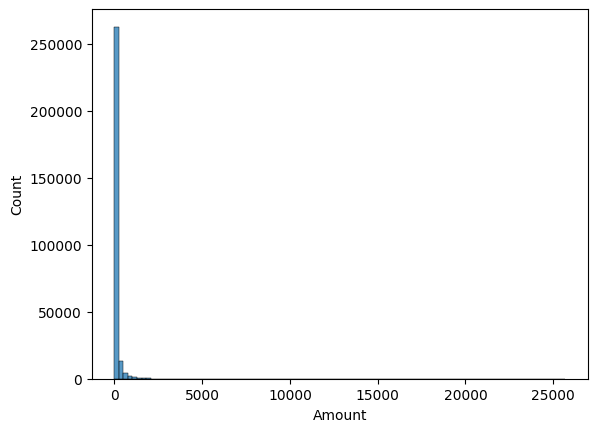

In [54]:
sns.histplot(df['Amount'], bins=100)
plt.show()

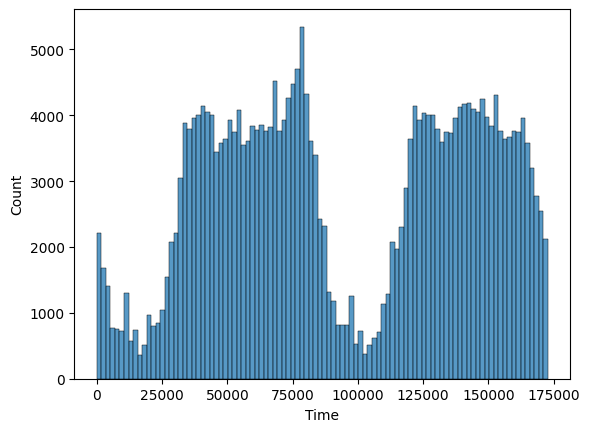

In [55]:
sns.histplot(df['Time'], bins=100)
plt.show()

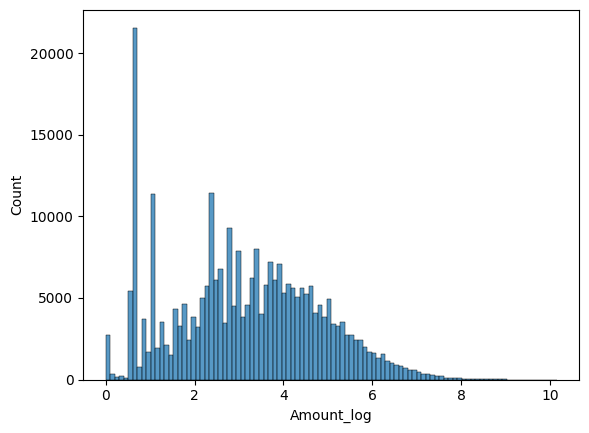

In [56]:
# log Amount 
import numpy as np
df['Amount_log'] = np.log1p(df['Amount'])
sns.histplot(df['Amount_log'], bins=100)
plt.show()

In [57]:
count = df['Class'].value_counts() / len(df) * 100
ratio_positive = count[0] / count[1]

In [58]:
df = df.drop(columns='Amount')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539


In [59]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X = df.drop(columns='Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(scale_pos_weight=ratio_positive)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56863     1]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.81      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100],
    'max_depth' : [3,5,7],
    'learning_rate' : [0.01,0.1,0.3]
    # 'min_child_weight' : [1,2,3]
}

grid = GridSearchCV(xgb, param_grid=param_grid, scoring='average_precision')
grid.fit(X_train, y_train)

print(grid.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


In [62]:
y_pred_grid = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

[[56860     4]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.82      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



0.9857827627393106


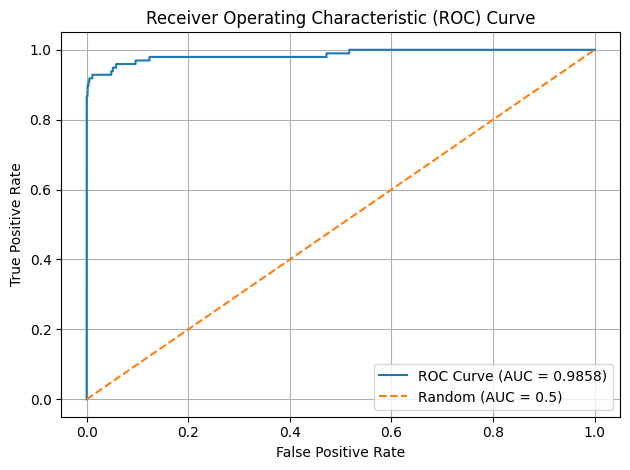

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = roc_auc_score(y_test, y_scores)
print(roc_auc)


plt.plot(fpr, tpr,label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 
         linestyle='--', label='Random (AUC = 0.5)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
import optuna
from sklearn.metrics import f1_score  # or accuracy_score


def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'scale_pos_weight': ratio_positive,
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0)
        }
    
    xgb = XGBClassifier(**param)
    xgb.fit(X_train, y_train)
    
    y_scores = xgb.predict_proba(X_test)[:, 1]
    y_pred = (y_scores > 0.92).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    return f1


optuna_study = optuna.create_study(direction='maximize')
optuna_study.optimize(objective, n_trials=200)

print("Best parameters:", optuna_study.best_params)
print("Best F1 score:", optuna_study.best_value)

[I 2025-06-27 05:23:26,197] A new study created in memory with name: no-name-e9c4a7c8-1760-4eb2-bf18-96447dc068bc
[I 2025-06-27 05:23:26,850] Trial 0 finished with value: 0.8556149732620321 and parameters: {'n_estimators': 68, 'max_depth': 5, 'learning_rate': 0.16370888935511732, 'subsample': 0.7460655664025064, 'colsample_bytree': 0.9539568496697972, 'gamma': 2.8516832334620634}. Best is trial 0 with value: 0.8556149732620321.
[I 2025-06-27 05:23:27,508] Trial 1 finished with value: 0.8729281767955801 and parameters: {'n_estimators': 70, 'max_depth': 6, 'learning_rate': 0.2855154135995919, 'subsample': 0.5808723690498167, 'colsample_bytree': 0.646157215865254, 'gamma': 4.135465356089732}. Best is trial 1 with value: 0.8729281767955801.
[I 2025-06-27 05:23:28,679] Trial 2 finished with value: 0.8729281767955801 and parameters: {'n_estimators': 144, 'max_depth': 7, 'learning_rate': 0.18956127356729133, 'subsample': 0.5853502547186267, 'colsample_bytree': 0.8536388586419384, 'gamma': 2.5

Best parameters: {'n_estimators': 152, 'max_depth': 8, 'learning_rate': 0.12489056025053005, 'subsample': 0.8682901249711722, 'colsample_bytree': 0.8497553119188078, 'gamma': 4.627293572292331}
Best F1 score: 0.9060773480662984


In [97]:
# Train a new model with the best parameters found by Optuna
best_params = optuna_study.best_params
best_params['scale_pos_weight'] = ratio_positive  # ensure class imbalance param is set

xgb_optuna = XGBClassifier(**best_params)
xgb_optuna.fit(X_train, y_train)

y_scores_optuna = xgb_optuna.predict_proba(X_test)[:, 1]
y_pred_optuna = (y_scores_optuna > 0.93).astype(int)
print(confusion_matrix(y_test, y_pred_optuna))
print(classification_report(y_test, y_pred_optuna))

[[56863     1]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.84      0.91        98

    accuracy                           1.00     56962
   macro avg       0.99      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [88]:
import optuna.visualization as vis

vis.plot_optimization_history(optuna_study).show()
vis.plot_param_importances(optuna_study).show()

In [105]:
import os
import joblib

os.makedirs('models', exist_ok=True)
joblib.dump(xgb_optuna, 'models/xgbclassifier.joblib')

['models/xgbclassifier.joblib']

In [92]:
model = joblib.load('xgbclassifier.joblib')
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8497553119188078, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=4.627293572292331, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.12489056025053005,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=152, n_jobs=None,
              num_parallel_tree=None, ...)

In [106]:
sample = np.random.rand(1, 30)  # shape: (1, 30)
prediction = model.predict(sample)
prediction

array([0])